In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

a)

In [2]:
x1 = np.array([2, -1, 1])
x2 = np.array([0, 3, -1])
x3 = np.array([2, 1, +3])
A = np.asmatrix([x1,x2,x3]) #Se crea la matriz asociada al sistema
V, U = la.eig(A)            #Se calculan los vectores y autovalores 
U = np.asmatrix(U)          #Matriz con los autovectores
np.diag(V, 0).round()       #matriz diagonal con los autovalores

array([[4.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 2.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 2.-0.j]])

b)

In [3]:
r0 = np.matrix([1,1,2])         #Condición inicial
tiempo = np.linspace(0,2,1000)  #Tiempo en el que se evalúa 
x = np.zeros(len(tiempo))       #Array de ceros para x
y = np.zeros(len(tiempo))       #Array de ceros para y
z = np.zeros(len(tiempo))       #Array de ceros para z
f = lambda t: np.exp(V*t)       #Función 
k =0                            #Contador 
for t in tiempo:
    FD = f(t)                   #Se calcula f(t)
    FD = np.diag(f(t),0)
    r = (U@FD@U.I)@r0.T       #Se hace la multiplicación matricial para encontrar r
    x[k]=np.real(r[0])        #Se asigna un dato al array de ceros
    y[k]=np.real(r[1])
    z[k]=np.real(r[2])
    k = k+1

c)

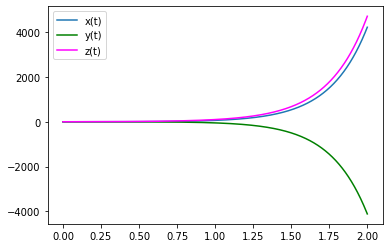

In [4]:
#Grafica
plt.plot(tiempo,x, label ='x(t)')
plt.plot(tiempo,y, label = 'y(t)',color = "green")
plt.plot(tiempo,z, label = 'z(t)',color = "magenta")
plt.legend();

d)

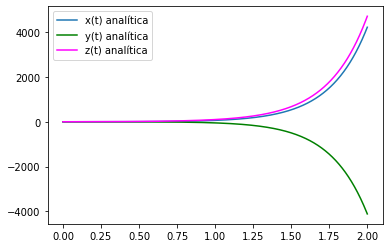

In [5]:
r = [1,1,2]

#Ecuaciones
def X(t):
    x = r[0]*(np.exp(2*t)*(1+np.exp(2*t)-2*t))+r[1]*(-2*t*np.exp(2*t))+r[2]*(np.exp(2*t)*(-1+np.exp(2*t)))
    return x/2
def Y(t):
    y = r[0]*(-np.exp(2*t)*(-1+np.exp(2*t)-2*t))+r[1]*(2*(t+1)*np.exp(2*t))+r[2]*(-np.exp(2*t)*(-1+np.exp(2*t)))
    return y/2
def Z(t):
    z = r[0]*(np.exp(2*t)*(-1+np.exp(2*t)+2*t))+r[1]*2*t*np.exp(2*t)+r[2]*np.exp(2*t)*(1+np.exp(2*t))
    return z/2

#Grafica
plt.plot(tiempo,X(tiempo),label ='x(t) analítica')
plt.plot(tiempo,Y(tiempo),label ='y(t) analítica', color = "green")
plt.plot(tiempo,Z(tiempo),label ='z(t) analítica',color = "magenta")
plt.legend();

2. Un proceso para encriptar un mensaje secreto es usar cierta matrix cuadrada cuyos elementos son enteros con elementos enteros en la inversa. Se recibe un mensaje, se asigna un número a cada letra Por ejemplo, A=1, B=2, C=3, ... etc y espacio=27), se arreglan los números en una matriz de izquierda a derecha en cada fila, donde el número de elementos en la fila es igual al tamano de la matriz de codigo, se multiplica esa matriz por la matriz de código por la derecha, se transcribe el mensaje en una cadena de números y se manda el mensaje. 

La persona que debe recibir el mensaje conoce la matriz de codigo. El o ellla arrelgan el mensaje encriptado en una matriz de izquierda a derecha en cada fila, en donde el numero de elementos en una fila conicide con el tamano de la matriz de codigo muplicada por la derecha, por el inverso de la matriz de código y puede leer mensaje decodificado.

Usted a recibido el siguiente mensaje que fue encriptado usando la matriz A. Decodifiquelo.

```
A = matrix([[ 1,  2, -3,  4,  5],
        [-2, -5,  8, -8, -9],
        [ 1,  2, -2,  7,  9],
        [ 1,  1,  0,  6, 12],
        [ 2,  4, -6,  8, 11]])
```

Mensaje

47,49,-19,257,487,10,-9,63,137,236, 79,142,-184,372,536,59,70,-40,332,588, 

la primera fila del mensaje es 47,49,-19,257,487

¿Cual es el mensaje?

In [6]:
#Matriz del mensaje
A = np.array([[ 1,  2, -3,  4,  5],
        [-2, -5,  8, -8, -9],
        [ 1,  2, -2,  7,  9],
        [ 1,  1,  0,  6, 12],
        [ 2,  4, -6,  8, 11]])

In [7]:
#Matriz de código
B = np.array([[ 47,  49, -19,  257,  487],
        [10,-9,63,137,236],
        [ 79,142,-184,372,536],
        [ 59,70,-40,332,588]])

In [8]:
#Inversa del mensaje
I = np.linalg.inv(A)

In [9]:
#Mensaje (multiplicar a derecha por la inversa de la matriz del mensaje)
M = np.dot(B,I)

In [10]:
#Diccionario con el abcedario
ABCD = {1:'A',2:'B',3:'C',4:'D',5:'E',6:'F',7:'G',8:'H',9:'I',10:'J',11:'K',12:'L',13:'M',
        14:'N',15:'O',16:'P',17:'Q',18:'R',19:'S',20:'T',21:'U',22:'V',23:'W',24:'X',25:'Y',
        26:'Z',27:' '}


text = ''                         #Cadena de texto con el mensaje

#Codigo para sacar el mensaje
for i in range(M.shape[0]):       #Recorreomos las filas
  for j in range(M.shape[1]):     #recorremos las columnas
    text += ABCD[M[i,j].round()]  #convertimos la posición [i,j] en una letra
print(text)

ARE YOU HAVING FUN  


3. Construir un programa que permita realizar la multiplicacion de dos matrices. El programa debe establecer si las matrices se pueden multiplicar.


In [11]:
def producto_matrices(M1,M2):
  """
  M1: es la matriz izquierda
  M2: es la matriz derecha
  """
  #Producto entre matrices
  try:
    M1 = np.asarray(M1)
    M2 = np.asarray(M2)

    M3 = np.zeros((M1.shape[0],M2.shape[1]))
    for i in range(M1.shape[0]):        #Recorremos las filas de M1
      fila = M1[i]
      for j in range(M2.shape[1]):      #Recorremos las columnas de M2
        columna = M2[:,j]
        M3[i,j] = (fila*columna).sum()  #valor de la posición [i,j] del producto
    return M3

  #Posibles errores al digitar la matriz
  except TypeError:                     #En caso de escribirse mal la matriz
    return "No se pueden multiplicar estas matrices"
  except ValueError:                    #En caso de poner mal un valor de la matriz
    return "No se pueden multiplicar estas matrices"

In [12]:

M1 = np.array([[2,2],[2,2],[1,1]])
print(M1)
print(M1.shape)
M2 = np.array([[1,0],[0,1]])
print(M2)
print(M2.shape)

[[2 2]
 [2 2]
 [1 1]]
(3, 2)
[[1 0]
 [0 1]]
(2, 2)


In [13]:
producto_matrices(M1,M2)

array([[2., 2.],
       [2., 2.],
       [1., 1.]])

In [14]:
M1 @ M2

array([[2, 2],
       [2, 2],
       [1, 1]])